In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import keras

 Loading and splitting the data

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
print(X_train[0].shape)

(32, 32, 3)


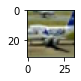

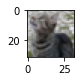

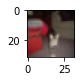

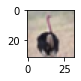

In [6]:
for i in range(332,336):
    plt.subplot(120+ 1 +i)
    img=X_train[i]
    plt.imshow(img)
    plt.show()

Processing the Data

In [7]:
X_train= X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape (X_test.shape[0], 32, 32, 3)
X_train = X_train.astype ('float32')
X_test =X_test.astype('float32')

X_train /=255
X_test=X_test/255
n_classes=10

print("Shape before one-hot encoding:", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("shape after one hot encoding:",Y_train.shape)

Shape before one-hot encoding: (50000, 1)
shape after one hot encoding: (50000, 10)


Building the model

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
# hidden layer
model.add(Dense(509, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#training
model.fit(X_train,Y_train,batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 369s 941ms/step - loss: 1.5843 - accuracy: 0.4142 - val_loss: 1.1608 - val_accuracy: 0.5814
Epoch 2/10
391/391 [==============================] - 368s 942ms/step - loss: 1.1054 - accuracy: 0.6064 - val_loss: 0.9320 - val_accuracy: 0.6811
Epoch 3/10
391/391 [==============================] - 367s 938ms/step - loss: 0.9285 - accuracy: 0.6727 - val_loss: 0.8993 - val_accuracy: 0.6891
Epoch 4/10
391/391 [==============================] - 400s 1s/step - loss: 0.8288 - accuracy: 0.7099 - val_loss: 0.7740 - val_accuracy: 0.7355
Epoch 5/10
391/391 [==============================] - 369s 944ms/step - loss: 0.7401 - accuracy: 0.7404 - val_loss: 0.7181 - val_accuracy: 0.7505
Epoch 6/10
391/391 [==============================] - 373s 954ms/step - loss: 0.6804 - accuracy: 0.7626 - val_loss: 0.6976 - val_accuracy: 0.7635
Epoch 7/10
391/391 [==============================] - 367s 938ms/step - loss: 0.6225 - accuracy: 0.7815 - val_loss: 0.6978 - va

In [9]:
classes=range(0, 10)
names =['airplane',
'automobile'
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']
#zip the names and classes to make a dictionary of
class_labels = dict(zip(classes, names))
#generate batch of 9 images to predict
batch = X_test[100:109]
labels=np.argmax (Y_test[100:109],axis= 1)

predictions= model.predict(batch, verbose=1)

1/1 [==============================] - 0s 210ms/step


In [10]:
print(predictions)

[[9.09408336e-05 7.29007070e-06 8.72540995e-02 1.50978211e-02
  6.46574199e-01 1.35226116e-01 6.75843912e-04 1.15024455e-01
  2.48544948e-05 2.43272261e-05]
 [9.47727676e-05 1.45189251e-05 3.69743295e-02 1.04688279e-01
  2.18204278e-02 7.53251791e-01 6.16556443e-02 2.13293955e-02
  1.00738660e-04 6.99968368e-05]
 [6.91670130e-06 2.77154231e-05 6.66170986e-03 7.49232667e-03
  4.89358645e-05 8.23699811e-04 9.84821498e-01 6.39183927e-05
  2.65384078e-05 2.66387451e-05]
 [5.16524160e-05 6.07418269e-06 9.99934599e-03 8.51245582e-01
  3.49759012e-02 1.31237078e-02 8.97932798e-02 5.13573876e-04
  2.04575372e-05 2.70372053e-04]
 [1.72396781e-08 9.99926269e-01 1.31627375e-13 1.83137750e-12
  1.91541612e-16 1.25921316e-14 4.13378489e-12 1.37842720e-14
  3.35615937e-07 7.33540801e-05]
 [1.30319256e-06 9.99881685e-01 1.38512854e-10 2.52026799e-09
  3.42955455e-13 2.55611868e-11 8.39838599e-09 2.20624761e-13
  8.79822765e-05 2.89263371e-05]
 [1.36746958e-01 4.29549906e-03 3.77764329e-02 3.62628311e

In [11]:
for image in predictions:
  print(np.sum(image))

0.99999994
0.9999999
0.9999998
0.9999999
1.0
0.9999999
0.9999999
0.9999998
1.0


In [12]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


Final object Detection

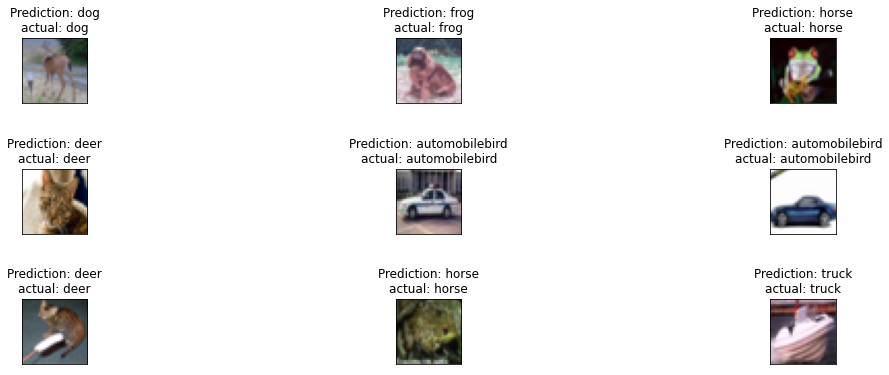

In [13]:
fig, axs=plt.subplots(3, 3, figsize=(19,6))
fig.subplots_adjust(hspace =1)
axs=axs.flatten()
for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i]==key:
              title='Prediction: {}\nactual: {}'.format(class_labels[key], class_labels[labels[i]])
              axs[i].set_title(title)
              axs[i].axes.get_xaxis().set_visible(False)
              axs[i].axes.get_yaxis().set_visible(False)
    # plot the image
    axs[i].imshow(img)
# Show the plot
plt.show()